In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Daten

In [2]:
daten = np.array([[8,12], [12,17],[20,20], [25,10],[22,35],[81,65], [70,75],[55,65],[51,60],[85,93],])
punkte = range(1, 11)

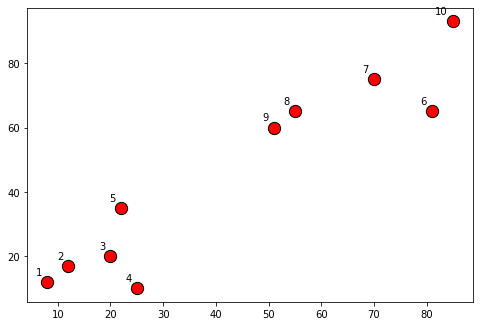

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.subplots_adjust(bottom=0.2)
plt.scatter(daten[:,0],daten[:,1], color = 'r', edgecolor='k', s=150)
for punkt, x, y in zip(punkte, daten[:, 0], daten[:, 1]):
    plt.annotate(punkt, xy=(x, y), xytext=(-5, 5), textcoords='offset points', ha='right', va='bottom')
plt.show() 

# Partitionierendes Clustering: KMeans

In [4]:
from sklearn.cluster import KMeans
k = 3
kmeans = KMeans(n_clusters = k, random_state=21)

In [5]:
kmeans.fit(daten)

KMeans(n_clusters=3, random_state=21)

In [6]:
centroide = kmeans.cluster_centers_
centroide

array([[78.66666667, 77.66666667],
       [17.4       , 18.8       ],
       [53.        , 62.5       ]])

In [7]:
clusters = kmeans.predict(daten)
clusters

array([1, 1, 1, 1, 1, 0, 0, 2, 2, 0], dtype=int32)

In [8]:
# Summe der quadrierten Distanzen aller Punkte zum nächsten Centroiden

summe_qd = kmeans.inertia_
summe_qd

1137.8333333333333

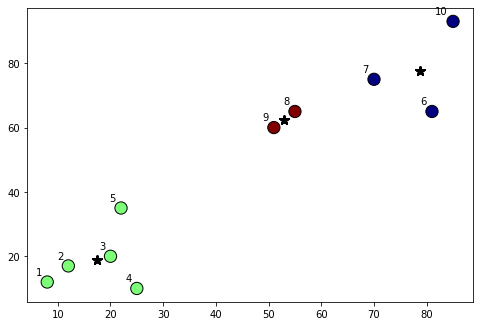

In [9]:
plt.figure(figsize=(8, 6))
plt.subplots_adjust(bottom=0.2)
plt.scatter(daten[:,0],daten[:,1], c=clusters, cmap='jet', edgecolor='k', s=150)
for punkt, x, y in zip(punkte, daten[:, 0], daten[:, 1]):
    plt.annotate(punkt, xy=(x, y), xytext=(-5, 5), textcoords='offset points', ha='right', va='bottom')
    plt.scatter(centroide[:,0],centroide[:,1], marker="*", c="black", s=100)
plt.show() 

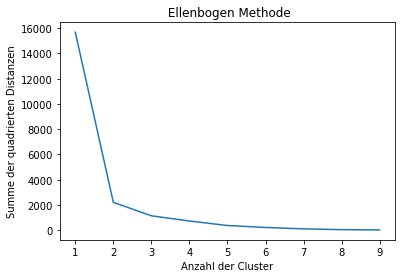

In [10]:
sqds = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, random_state=21)
    kmeans.fit(daten)
    sqds.append(kmeans.inertia_)
plt.plot(range(1, 10), sqds)
plt.title(' Ellenbogen Methode')
plt.xlabel('Anzahl der Cluster')
plt.ylabel('Summe der quadrierten Distanzen')
plt.show()


# Hierarchisches Clustering

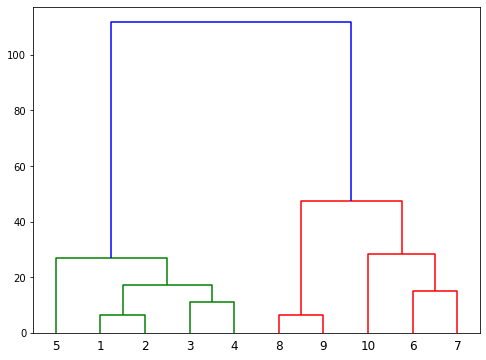

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage
links = linkage(daten, 'complete')
punkte = range(1, 11)
plt.figure(figsize=(8, 6))
dendrogram(links, orientation='top', labels=punkte, distance_sort='descending', show_leaf_counts=True)
plt.show()

In [12]:
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
clusters = agglo.fit_predict(daten)
clusters

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

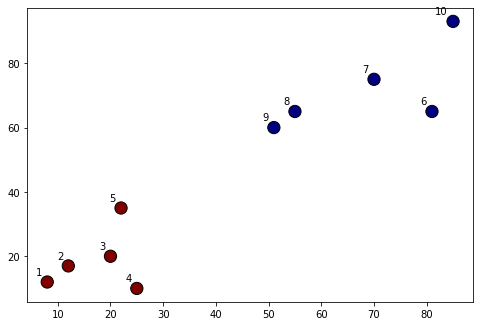

In [13]:
plt.figure(figsize=(8, 6))
plt.subplots_adjust(bottom=0.2)
plt.scatter(daten[:,0],daten[:,1], c=clusters, cmap='jet', edgecolor='k', s=150)
for punkt, x, y in zip(punkte, daten[:, 0], daten[:, 1]):
    plt.annotate(punkt, xy=(x, y), xytext=(-5, 5), textcoords='offset points', ha='right', va='bottom')
plt.show()